In [1]:
import pandas as pd
import numpy as np
import re

from torch import nn
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import *
import torchvision.models as models


import torch.nn as nn
from transformers import BertModel, BertTokenizer
import torch.nn as nn
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from torch.nn import Transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# import pre-processed data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import keras_toolkit as kt
import keras.backend as K
from sklearn.model_selection import train_test_split
from textwrap import wrap

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-16 16:12:17.630384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 16:12:18.435743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/train.csv')
val_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/val.csv')
testing_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/test.csv')

In [3]:
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
img_model = tf.keras.applications.MobileNet(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet' )

In [4]:
def get_imageEmbeddings(model,imagePath):
    image = tf.keras.preprocessing.image.load_img(imagePath,target_size= size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings,axis =0)
    meanImgEmb2 = np.mean(meanImgEmb1,axis=0)
    meanImgEmb = np.mean(meanImgEmb2,axis=0)
    return meanImgEmb

In [5]:
image_embeddings={}
for index,row in  training_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    image_embeddings[row[0]] = img_emb

val_image_embeddings={}
for index,row in  val_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    val_image_embeddings[row[0]] = img_emb

test_image_embeddings={}
for index,row in  testing_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    test_image_embeddings[row[0]] = img_emb

Text(0, 0.5, 'Score')

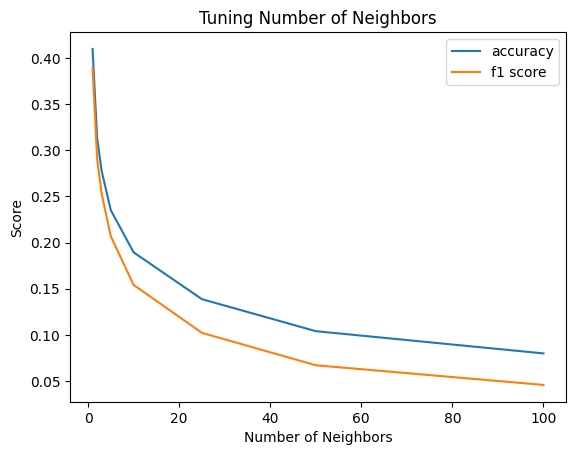

In [6]:
acc_dict = {}
f1_dict = {}
X_train, X_val, y_train, y_val = image_embeddings, val_image_embeddings, training_dataset.label_group, val_dataset.label_group

# X_train_rs = np.array(X_train.values()).reshape(-1, 1)
# X_val_rs = np.array(X_val.values()).reshape(-1, 1)
# y_train_rs = np.array(y_train.values()).reshape(-1, 1)

from sklearn.metrics import accuracy_score, f1_score
for k in [1, 2, 3, 5, 10, 25, 50, 100]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(list(X_train.values()), y_train)
    y_pred = knn.predict(list(X_val.values()))

    # Evaluate the performance on the test set
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc_dict[k] = accuracy
    f1_dict[k] = f1

plt.plot(acc_dict.keys(), acc_dict.values(), label='accuracy')
plt.plot(f1_dict.keys(), f1_dict.values(), label='f1 score')
plt.legend()
plt.title('Tuning Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')


In [7]:
acc_dict[1]

0.4096715328467153

In [8]:
f1_dict[1]

0.38902654041313983

In [9]:
X_test, y_test = test_image_embeddings, testing_dataset.label_group

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(list(X_train.values()), y_train)
y_pred = knn.predict(list(X_test.values()))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy = {accuracy}')
print(f'F1 score = {f1}')

Accuracy = 0.39883211678832114
F1 score = 0.3769925121941008
